# Image Retieval Based on Microstructure Description

In [2]:
# importing libraries
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

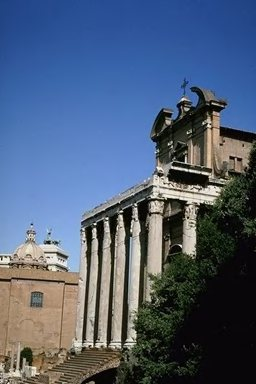

In [17]:
from IPython.display import Image
img = cv2.imread('215.jpg')
width, height, channels = img.shape
Image('215.jpg')

In [18]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [19]:
colnum1 = 8   #the quantization number of H 
colnum2 = 3   #the quantization number of S 
colnum3 = 3   #the quantization number of V
VI = 0
SI = 0
HI = 0
QuantizedImage = np.zeros(width*height).reshape(width,height)
for i in range(width):
    for j in range (height):
        VI = hsv[i, j, 0] * (colnum1 / 360.0)
        if (VI >= colnum1 - 1):
            VI = colnum1 - 1
        SI = hsv[i, j, 1] * (colnum2 / 1.0)
        if (SI >= colnum2 - 1):
            SI = colnum2 - 1;
        HI = hsv[i, j, 2] * (colnum3 / 1.0)
        if (HI >= colnum3 - 1):
            HI = colnum3 - 1
        QuantizedImage[i][j] = (colnum3 * colnum2) * VI + colnum3 * SI + HI
QuantizedImage    

array([[29.8, 29.8, 29.8, ..., 29.8, 29.8, 29.8],
       [29.8, 29.8, 29.8, ..., 29.8, 29.8, 29.8],
       [29.8, 29.8, 29.8, ..., 29.8, 29.8, 29.8],
       ...,
       [11.4, 11.4, 11.4, ..., 36. , 36. , 36. ],
       [11.4, 11.4, 11.4, ..., 36. , 36. , 36. ],
       [11.4, 11.4, 11.4, ..., 36. , 36. , 36. ]])

## Edge orientation detection in HSV color space

In [20]:
OrientationImage = np.zeros(width*height).reshape(width,height)
gxx=gyy=gxy = 0.0
rh=gh=bh = 0.0
rv=gv=bv = 0.0
theta = 0.0
hsvComponent = np.zeros(3*width*height).reshape(width,height,3)
num = 6   #the quantization number of edge orientation

for i in range(width):
    for j in range(height):
        hsvComponent[i, j, 0] = hsv[i, j, 1] * math.cos(hsv[i, j, 0])
        hsvComponent[i, j, 1] = hsv[i, j, 1] * math.sin(hsv[i, j, 0])
        hsvComponent[i, j, 2] = hsv[i, j, 2]
for i in range(width-2):
    for j in range(height-2):
        
        rh = (hsvComponent[i - 1, j + 1,0] + 2 * hsvComponent[i, j + 1,0] + hsvComponent[i + 1, j + 1,0]) - (hsvComponent[i - 1, j - 1,0] + 2 * hsvComponent[i, j - 1,0] + hsvComponent[i + 1, j - 1,0]);
        gh = (hsvComponent[i - 1, j + 1,1] + 2 * hsvComponent[i, j + 1,1] + hsvComponent[i + 1, j + 1,1]) - (hsvComponent[i - 1, j - 1,1] + 2 * hsvComponent[i, j - 1,1] + hsvComponent[i + 1, j - 1,1]);
        bh = (hsvComponent[i - 1, j + 1,2] + 2 * hsvComponent[i, j + 1,2] + hsvComponent[i + 1, j + 1,2]) - (hsvComponent[i - 1, j - 1,2] + 2 * hsvComponent[i, j - 1,2] + hsvComponent[i + 1, j - 1,2]);
        
        rv = (hsvComponent[i + 1, j - 1,0] + 2 * hsvComponent[i + 1, j,0] + hsvComponent[i + 1, j + 1,0]) - (hsvComponent[i - 1, j - 1,0] + 2 * hsvComponent[i - 1, j,0] + hsvComponent[i - 1, j + 1,0]);
        gv = (hsvComponent[i + 1, j - 1,1] + 2 * hsvComponent[i + 1, j,1] + hsvComponent[i + 1, j + 1,1]) - (hsvComponent[i - 1, j - 1,1] + 2 * hsvComponent[i - 1, j,1] + hsvComponent[i - 1, j + 1,1]);
        bv = (hsvComponent[i + 1, j - 1,2] + 2 * hsvComponent[i + 1, j,2] + hsvComponent[i + 1, j + 1,2]) - (hsvComponent[i - 1, j - 1,2] + 2 * hsvComponent[i - 1, j,2] + hsvComponent[i - 1, j + 1,2]);
        
        gxx = math.sqrt(rh * rh + gh * gh + bh * bh)
        gyy = math.sqrt(rv * rv + gv * gv + bv * bv)
        gxy = rh * rv + gh * gv + bh * bv
        
        theta = (math.acos(gxy / (gxx * gyy + 0.0001)) * 180.0 / math.pi)
        
        OrientationImage[i, j] = (int)(round(theta * num / 180.0))

        if (OrientationImage[i, j] >= num - 1):
            OrientationImage[i, j] = num - 1

## Implementing Structure Maps

In [21]:
def StructureMaps(OrientationImage,img,wid,hei,Dx,Dy):
    Color = np.zeros(width*height).reshape(width,height)
    for i in range(width/3):
        for j in range(height/3):
            WA = np.zeros(9)
            m = 3 * i + Dx;
            n = 3 * j + Dy;
            WA[0] = OrientationImage[m - 1, n - 1];
            WA[1] = OrientationImage[m - 1, n];
            WA[2] = OrientationImage[m - 1, n + 1];
            WA[3] = OrientationImage[m + 1, n - 1];
            WA[4] = OrientationImage[m + 1, n];
            WA[5] = OrientationImage[m + 1, n + 1];
            WA[6] = OrientationImage[m, n - 1];
            WA[7] = OrientationImage[m, n + 1];
            WA[8] = OrientationImage[m, n];
            if (WA[8] == WA[0]):
                Color[m - 1, n - 1] = img[m - 1, n - 1]
            else:
                Color[m - 1, n - 1] = -1
        
            if (WA[8] == WA[1]):
                Color[m - 1, n] = img[m - 1, n]
            else:
                Color[m - 1, n] = -1
        
            if (WA[8] == WA[2]):
                Color[m - 1, n + 1] = img[m - 1, n + 1]
            else:
                Color[m - 1, n + 1] = -1
        
            if (WA[8] == WA[3]):
                Color[m + 1, n - 1] = img[m + 1, n - 1]
            else:
                Color[m + 1, n - 1] = -1
            
            if (WA[8] == WA[4]):
                Color[m + 1, n] = img[m + 1, n]
            else:
                Color[m + 1, n] = -1
            if (WA[8] == WA[5]):
                Color[m + 1, n + 1] = img[m + 1, n + 1]
            else:
                Color[m + 1, n + 1] = -1
            if (WA[8] == WA[6]):
                Color[m, n - 1] = img[m, n - 1]
            else:
                Color[m, n - 1] = -1
            if (WA[8] == WA[7]):
                Color[m, n + 1] = img[m, n + 1]
            else:
                Color[m, n + 1] = -1
            if (WA[8] == WA[8]):
                Color[m, n] = img[m, n]
    return Color

## Micro-structure definition and map extraction

In [22]:
ColorA = StructureMaps(OrientationImage,QuantizedImage,width,height,0,0)
ColorB = StructureMaps(OrientationImage,QuantizedImage,width,height,0,1)
ColorC = StructureMaps(OrientationImage,QuantizedImage,width,height,1,0)
ColorD = StructureMaps(OrientationImage,QuantizedImage,width,height,1,1)
ColorD

array([[-1. , -1. , -1. , ..., -1. , -1. ,  0. ],
       [-1. , 29.8, -1. , ..., 29.8, -1. ,  0. ],
       [-1. , 29.8, 29.8, ..., -1. , -1. ,  0. ],
       ...,
       [-1. , -1. , -1. , ..., -1. , 36. ,  0. ],
       [11.4, 11.4, 11.4, ..., 36. , 36. ,  0. ],
       [11.4, 11.4, 11.4, ..., 36. , 36. ,  0. ]])

## Micro-structre Detections

In [23]:
micro = np.zeros(width*height).reshape(width,height)
for i in range(width):
    for j in range(height):
        micro[i][j] = int(max(ColorA[i][j], max(ColorB[i][j], max(ColorC[i][j], ColorD[i][j]))));
micro = micro.astype(int)
micro

array([[29, 29, 29, ..., 29,  0,  0],
       [29, 29, -1, ..., 29,  0,  0],
       [29, 29, 29, ..., 29,  0,  0],
       ...,
       [11, 11, -1, ..., 36, 36, 36],
       [11, 11, 11, ..., 36, 36, 36],
       [11, 11, 11, ..., 36, 36, 36]])

## Micro-structure Descriptor

In [24]:
CSA = 72
hist = np.zeros(CSA)
MS = np.zeros(CSA)
HA = np.zeros(CSA)
for i in range(width-1):
    for j in range(height-1):
        if(micro[i][j] >= 0):
            HA[micro[i][j]]+=1
            
for i in range(3,3*(width/3)-1):
    for j in range(3,3*(height/3)-1):
        wa = np.zeros(9)
        wa[0] = micro[i - 1][j - 1]
        wa[1] = micro[i - 1][j]
        wa[2] = micro[i - 1][j + 1]
        
        wa[3] = micro[i + 1][j - 1]
        wa[4] = micro[i + 1][j]
        wa[5] = micro[i + 1][j + 1]
        
        wa[6] = micro[i][j - 1]
        wa[7] = micro[i][j + 1]
        wa[8] = micro[i][j]
        wa = wa.astype(int)
        TE1 = 0
        for m in range(8):
            if ((wa[8] == wa[m]) and (wa[8] >= 0)):
                TE1 = TE1+1
        if(wa[8]>=0):
            MS[wa[8]] +=TE1
            
for i in range(CSA):
    hist[i] = (MS[i] * 1.0) / (8.0 * HA[i] + 0.0001)
hist.size

72

[array([0.        , 0.        , 0.43765507, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10294117, 0.18788818,
       0.59721309, 0.66896865, 0.53707565, 0.45848017, 0.41602832,
       0.46822238, 0.44610969, 0.50946126, 0.42606068, 0.30165289,
       0.1781088 , 0.22321428, 0.29347823, 0.24999999, 0.29047617,
       0.13970583, 0.24999997, 0.28395952, 0.32522454, 0.90119115,
       0.79153037, 0.10144926, 0.3804517 , 0.36923073, 0.59514923,
       0.        , 0.93151986, 0.59999988, 0.        , 0.58887279,
       0.16666644, 0.5298549 , 0.36063213, 0.09999992, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])]
72


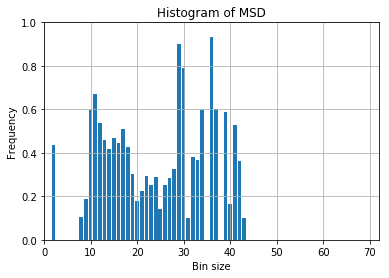

In [28]:
print len(hist)
plt.axis([0, 72, 0, 1])
plt.bar(np.arange(72),hist)
plt.xlabel('Bin size')
plt.ylabel('Frequency')
plt.title('Histogram of MSD')
plt.grid(True)

plt.show()

In [29]:
hist2 = np.array([0.        , 0.        , 0.43765507, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10294117, 0.18788818,
       0.59721309, 0.66896865, 0.53707565, 0.45848017, 0.41602832,
       0.46822238, 0.44610969, 0.50946126, 0.42606068, 0.30165289,
       0.1781088 , 0.22321428, 0.29347823, 0.24999999, 0.29047617,
       0.13970583, 0.24999997, 0.28395952, 0.32522454, 0.90119115,
       0.79153037, 0.10144926, 0.3804517 , 0.36923073, 0.59514923,
       0.        , 0.93151986, 0.59999988, 0.        , 0.58887279,
       0.16666644, 0.5298549 , 0.36063213, 0.09999992, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [34]:
diff2 = hist - hist2
np.count_nonzero(hist2)
diff2

array([ 0.00000000e+00,  0.00000000e+00,  3.27372601e-09,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.34255941e-09,  4.17017204e-09, -4.65477268e-09, -4.81017326e-09,
        3.40185347e-09,  3.68678316e-09, -3.00852093e-09,  1.96440031e-10,
        1.03246373e-09,  1.63478808e-09, -1.81833176e-09, -2.63176458e-09,
        4.44497397e-09, -4.77510692e-09, -1.03024228e-09, -1.92748037e-09,
        3.18594212e-09,  9.90503318e-10, -4.80732953e-11, -2.94505181e-09,
       -1.27337346e-09,  1.52519075e-09,  2.29063402e-09, -3.01616974e-09,
       -1.41945872e-09,  3.72781406e-09,  1.52428237e-09,  0.00000000e+00,
       -1.80310544e-10,  4.61540683e-09,  0.00000000e+00, -1.78669857e-10,
       -4.81449333e-09, -4.06961209e-09,  2.09308448e-09, -3.33326390e-09,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

72
[0.00000000e+00 0.00000000e+00 3.27372601e-09 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.34255941e-09 4.17017204e-09 4.65477268e-09 4.81017326e-09
 3.40185347e-09 3.68678316e-09 3.00852093e-09 1.96440031e-10
 1.03246373e-09 1.63478808e-09 1.81833176e-09 2.63176458e-09
 4.44497397e-09 4.77510692e-09 1.03024228e-09 1.92748037e-09
 3.18594212e-09 9.90503318e-10 4.80732953e-11 2.94505181e-09
 1.27337346e-09 1.52519075e-09 2.29063402e-09 3.01616974e-09
 1.41945872e-09 3.72781406e-09 1.52428237e-09 0.00000000e+00
 1.80310544e-10 4.61540683e-09 0.00000000e+00 1.78669857e-10
 4.81449333e-09 4.06961209e-09 2.09308448e-09 3.33326390e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000

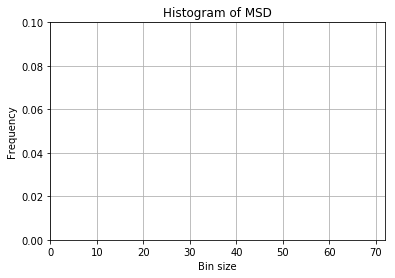

In [37]:
print len(hist)
print(abs(diff2))
plt.axis([0, 72, 0, 0.1])
plt.bar(np.arange(72),abs(diff2))
plt.xlabel('Bin size')
plt.ylabel('Frequency')
plt.title('Histogram of MSD')
plt.grid(True)

plt.show()